In [59]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions

from causalimpact import CausalImpact

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Does your promo work? 

2022-11-17, Warsaw, PL

Have you ever wondered how to measure the real impact of a marketing campaign or a social policy is not influenced by accidental factors? In the talk we’ll demonstrate how to leverage Bayesian structural time series model to estimate the causal effect of interventions using Python and TensorFlow Probability. We’ll discuss the advantages and limitations of this approach. By the end of the talk you will be able to apply the discussed methodology to your own problems.

## Get the data

### Read

In [66]:
data_file = './data/gt_social_media_data.csv'

In [67]:
data = pd.read_csv(data_file)

### Transform and visualize

In [68]:
data.index = pd.to_datetime(data['date'])
data = data.drop('date', axis=1)

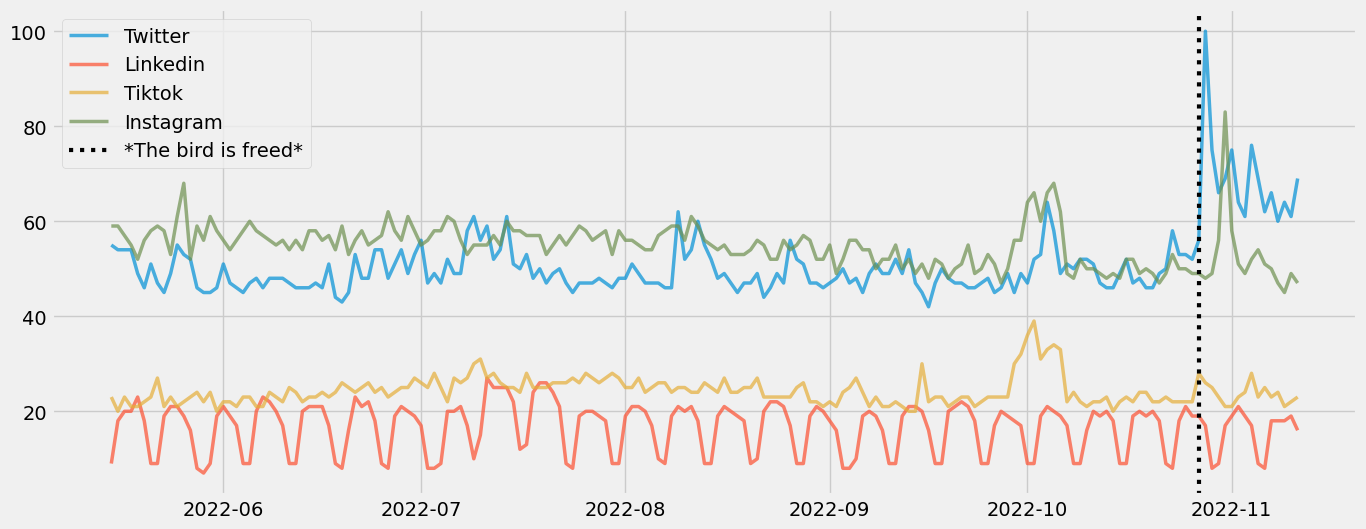

In [69]:
plt.figure(figsize=(15, 6))

for series in data.columns:
    plt.plot(data[series], label=series.title(), lw=2.5, alpha=.7)
    
plt.axvline(pd.to_datetime('2022-10-27'), color='black', lw=3, ls='dotted', label='*The bird is freed*')
plt.legend()
plt.show()

In [70]:
# Rename columns
data = data.rename(columns={
    'twitter': 'y',
    'linkedin': 'x0',
    'tiktok': 'x1',
    'instagram': 'x2'
})

## Model

### Using variational inference

In [ ]:
# Define the periods
pre_period = ['20220515', '20221027']
post_period = ['20221028', '20221111']

# Fit the model
ci = CausalImpact(data, pre_period, post_period)

In [ ]:
# Plot the model and estimated effects
ci.plot(figsize=(25, 10))

In [ ]:
# Print model summary
print(ci.summary())

In [53]:
# Check inferences (pd.DataFrame)
ci.inferences.tail()

In [54]:
# Print a report 
print(ci.summary('report'))

### Using Hamiltonian Monte Carlo

In [ ]:
# Fit the model using HMC
ci = CausalImpact(data, pre_period, post_period, model_args={'fit_method': 'hmc'})

In [ ]:
# Plot the model and estimated effects
ci.plot(figsize=(25, 10))

## Add custom components

In [64]:
from causalimpact.misc import standardize

normed_data, _ = standardize(data.astype(np.float32))

obs_data = tfp.sts.regularize_series(normed_data['2022-10-27':].iloc[:, 0])

linear_level = tfp.sts.LocalLinearTrend(observed_time_series=obs_data)
linear_reg = tfp.sts.LinearRegression(design_matrix=normed_data.iloc[:, 1:].values.reshape(-1, normed_data.shape[1] -1))

model = tfp.sts.Sum([linear_level, linear_reg], observed_time_series=obs_data)

pre_period = ['20220515', '20221027']
post_period = ['20221028', '20221111']

ci = CausalImpact(data, pre_period, post_period, model=model)

More examples for custom models: https://github.com/WillianFuks/tfcausalimpact/blob/master/notebooks/getting_started.ipynb

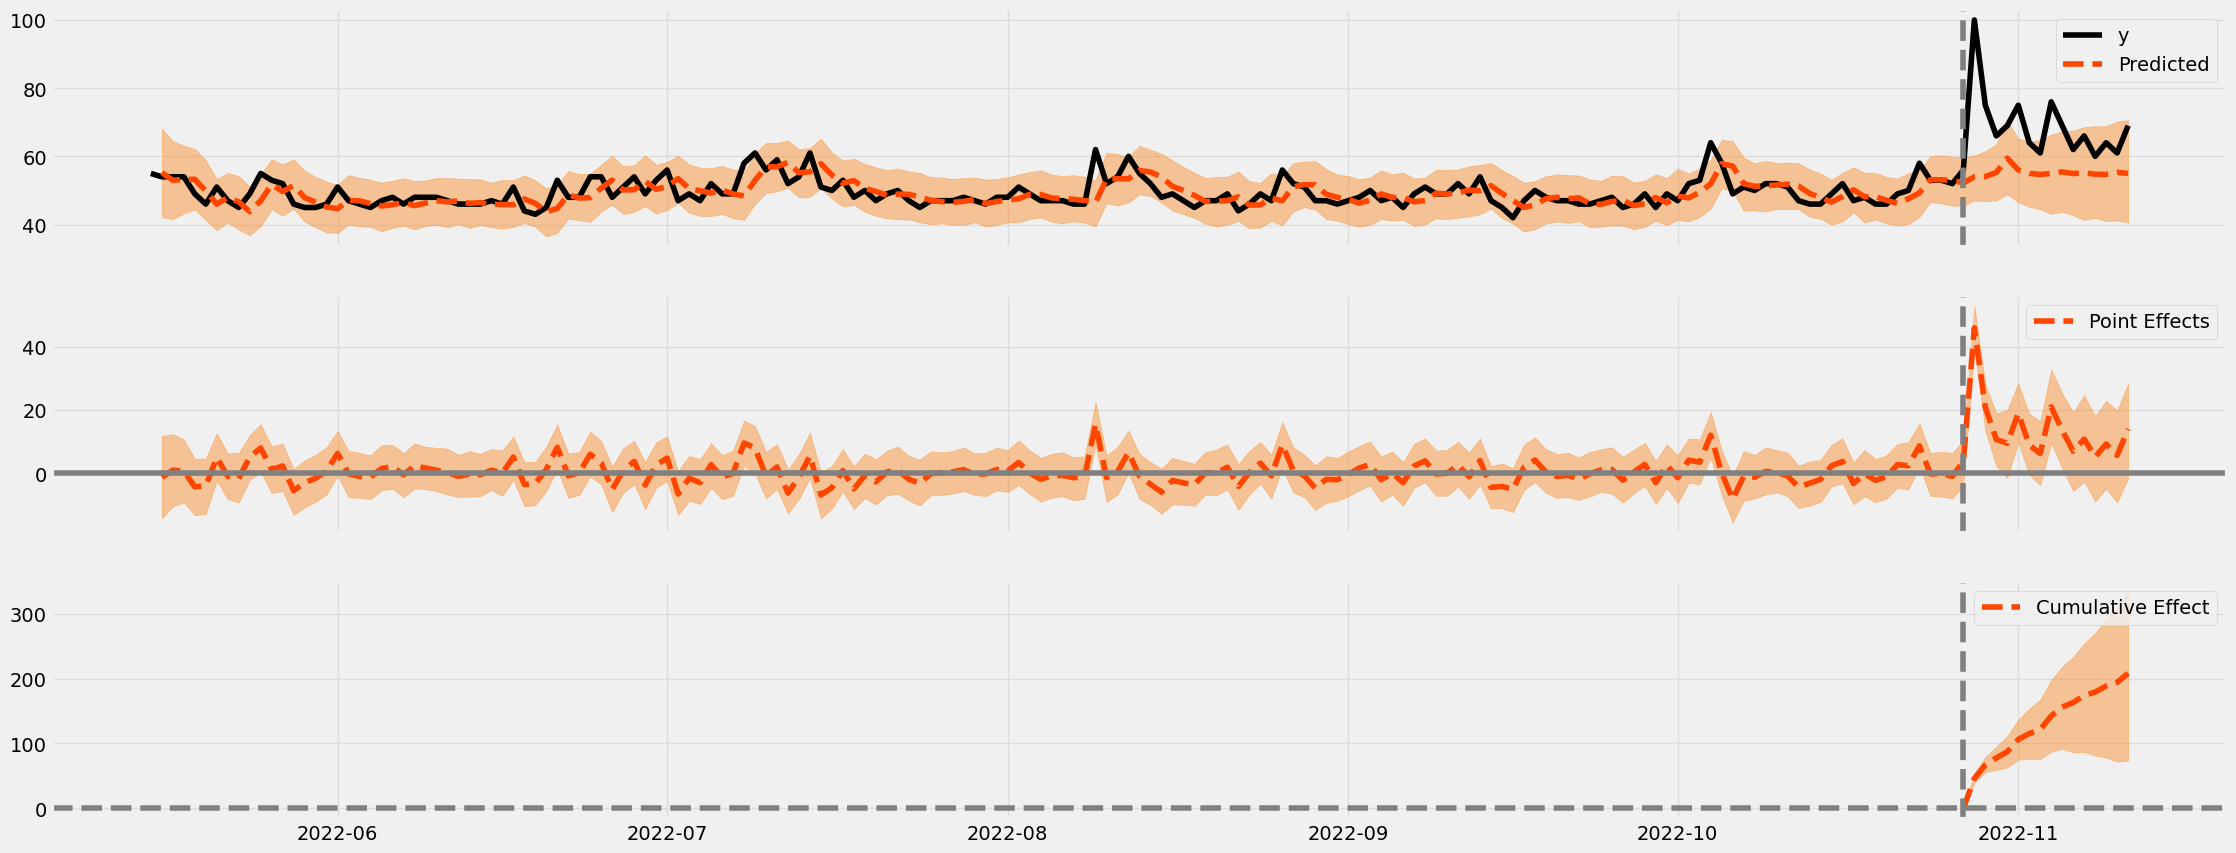

In [65]:
# Plot the model and estimated effects
ci.plot(figsize=(25, 10))

## Learn more

* Cunningham, S. (2019). *Causal Inference. The Mixtape.* Yale University Press. Chapter 10.
    * [Online](https://mixtape.scunning.com/10-synthetic_control)
    * [Physical copy (Amazon)](https://amzn.to/3MOINqp)


* Brodersen, K. (2016). [Inferring the effect of an event using CausalImpact by Kay Brodersen](https://www.youtube.com/watch?v=GTgZfCltMm8). *YouTube*. [Video]


* Fuks, W. (2020). [Implementing Causal Impact on Top of TensorFlow Probability](https://towardsdatascience.com/implementing-causal-impact-on-top-of-tensorflow-probability-c837ea18b126). *Medium*.


* Synthetic control. [*Wikipedia*](https://en.wikipedia.org/wiki/Synthetic_control_method).
 
 
* `tfcausalimpact` [documentation](https://github.com/WillianFuks/tfcausalimpact)


